In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
_ = sns.color_palette("tab10")

TABLE $2$. Statistics on the computational times of the MIQP formulation in $(9)$ for the fifty instances generated for each scenario in Table $1$ and $n\in\{100,200,400\}$.

In [2]:
pd.read_parquet("../data/table2.parquet")

n_samples                         100                200                400  \
                                 mean median   std  mean median   std  mean   
scenario Bounds_coef Warm_start                                               
1        False       False       3600   3600     0  3172   3600   836   176   
                     True        3600   3600     0  3169   3600   806   174   
         True        False       3600   3600     0   659    278  1022   164   
                     True        3570   3600   212   400    324   453   136   
2        False       False       2020   2028   830   386    300   320   114   
                     True        1901   1768   764   335    295   157   113   
         True        False        856    831   470   153    131   100   110   
                     True         565    513   247   150    141    74   108   
3        False       False       3555   3600   264  3216   3600   681  1459   
                     True        3542   3600   351  3079   3600   918  1410   
         True        False       3539   3600   345   249    162   491   104   
                     True        3043   3600  1013   211    153   414    94   

n_samples                                    
                                median  std  
scenario Bounds_coef Warm_start              
1        False       False         106  181  
                     True          112  217  
         True        False         102  207  
                     True           94  169  
2        False       False          96   71  
                     True          114   38  
         True        False          99   60  
                     True           71  136  
3        False       False        1176  809  
                     True         1094  933  
         True        False          75  127  
                     True           53  151

In [3]:
pd.read_parquet("../data/table2_bis.parquet")

n_samples                        100  200  400
scenario Bounds_coef Warm_start               
1        False       False         0   13   50
                     True          0   13   50
         True        False         0   45   50
                     True          1   50   50
2        False       False        44   50   50
                     True         44   50   50
         True        False        50   50   50
                     True         50   50   50
3        False       False         2   17   47
                     True          2   18   47
         True        False         2   49   50
                     True         16   50   50

TABLE $3$. Statistics on the optimality gaps reported by the solver for the instances not solved before the time limit in Table $2$.

In [4]:
pd.read_parquet("../data/table3.parquet")

n_samples                              100                            200  \
                                      mean     median       std      mean   
scenario Bounds_coef Warm_start                                             
1        False       False       22.637418  23.176806  7.793620  7.834619   
                     True        22.476072  22.498254  6.184927  6.776182   
         True        False       22.205313  22.630273  7.826100  5.098502   
                     True        21.708140  22.055553  7.224710       NaN   
2        False       False       13.952053  14.529950  5.786255       NaN   
                     True        12.205574  11.880620  3.241040       NaN   
3        False       False       18.813410  18.065394  7.164194  5.659901   
                     True        18.303967  17.478314  7.582783  5.584258   
         True        False       16.993928  18.128079  7.072333  3.865035   
                     True        16.366486  15.432683  7.497266       NaN   

n_samples                                                 400            \
                                   median       std      mean    median   
scenario Bounds_coef Warm_start                                           
1        False       False       7.100348  4.502750       NaN       NaN   
                     True        6.065587  3.467000       NaN       NaN   
         True        False       4.823314  2.358120       NaN       NaN   
                     True             NaN       NaN       NaN       NaN   
2        False       False            NaN       NaN       NaN       NaN   
                     True             NaN       NaN       NaN       NaN   
3        False       False       5.861752  2.746271  1.893236  2.188571   
                     True        4.717514  2.629519  1.734289  1.629757   
         True        False       3.865035       NaN       NaN       NaN   
                     True             NaN       NaN       NaN       NaN   

n_samples                                  
                                      std  
scenario Bounds_coef Warm_start            
1        False       False            NaN  
                     True             NaN  
         True        False            NaN  
                     True             NaN  
2        False       False            NaN  
                     True             NaN  
3        False       False       0.560679  
                     True        0.181314  
         True        False            NaN  
                     True             NaN

TABLE $4$. Statistics on the $\text{Dev}$ metric in $(13)$ for the fifty instances generated for each scenario in Table $1$ and $n\in\{100,200,400\}$.

In [5]:
pd.read_parquet("../data/table4.parquet")

n_samples     100                    200                  400              
             mean  median     std   mean median    std   mean median    std
scenario                                                                   
1          12.733  10.231  10.163  5.973  1.616  8.169  3.438  0.000  7.325
2           0.577   0.000   2.222  0.353  0.029  2.831  0.011  0.000  2.059
3           3.766   1.904   4.469  1.270  0.786  1.509  0.679  0.326  1.049

TABLE $5$. Statistics on the computational times of FSAM for the fifty instances generated
for each scenario in Table $1$ and $n\in\{100,200,400\}$.

In [6]:
pd.read_parquet("../data/table5.parquet")

n_samples  100              200              400            
          mean median  std mean median  std mean median  std
scenario                                                    
1          217    125  321  180    128  186  131     90  165
2          159    116  167  135    109   79  128    127   63
3          172    106  196  138     85  173  119     59  148

TABLE $6$. Statistics on the computation times of the MIQP formulation in $(9)$ using the solution of FSAM as a warm start for the fifty instances generated for each scenario in Table $1$ and $n\in\{100,200,400\}$

In [7]:
pd.read_parquet("../data/table6.parquet")

n_samples              100                200               400            
                      mean median   std  mean median  std  mean median  std
scenario Bounds_coef                                                       
1        False        3600   3600     0  3406   3600  395   153    151   72
         True         3576   3600   172   222     93  354    91     62   92
2        False        1888   1990  1012   313    192  320   109     84   87
         True          257    166   317   143    124   87   110     76   82
3        False        3521   3600   330  3013   3600  872  1270   1229  625
         True         2992   3600  1038   175     99  361    79     42   98

In [8]:
pd.read_parquet("../data/table6_bis.parquet")

n_samples             100  200  400
scenario Bounds_coef               
1        False          0   14   50
         True           1   50   50
2        False         45   50   50
         True          50   50   50
3        False          3   20   48
         True          17   50   50

TABLE $7$. Statistics on the optimality gaps reported by the solver for the instances not solved before the time limit in TABLE $6$.

In [9]:
pd.read_parquet("../data/table7.parquet")

n_samples                  100                           200            \
                           50%      mean       std       50%      mean   
scenario Bounds_coef                                                     
1        False        0.209032  0.210759  0.090730  0.054555  0.069253   
         True         0.181742  0.188955  0.066602       NaN       NaN   
2        False        0.134058  0.134090  0.041819       NaN       NaN   
3        False        0.152348  0.177390  0.079120  0.043715  0.049910   
         True         0.131134  0.147471  0.053200       NaN       NaN   

n_samples                            400                      
                           std       50%      mean       std  
scenario Bounds_coef                                          
1        False        0.032211       NaN       NaN       NaN  
         True              NaN       NaN       NaN       NaN  
2        False             NaN       NaN       NaN       NaN  
3        False        0.028311  0.012634  0.015363  0.006115  
         True              NaN       NaN       NaN       NaN

In [10]:
def s(col: str, mode: str):
    if col.name[2] == "std":
        out = col.groupby(level=[0, 1]).transform("min")
    else:
        out = col.groupby(level=[0, 1]).transform(mode)
    return (col == out).map({True: "background-color: green", False: ""})


def true_nonzero(scenario: int, num_vars: int):
    if scenario == 1:
        out = (
            [1] * 3
            + [0] * 3
            + [1] * 3
            + [0] * (num_vars - 9)
            + [0] * 3
            + [1] * 3
            + [1] * 3
            + [0] * (num_vars - 9)
        )
    if scenario == 2:
        out = [0] * num_vars + [1] * 4 + [0] * (num_vars - 4)
    if scenario == 3:
        out = [1] * 9 + [0] * (2 * num_vars - 9)
    return out


def compute_metrics(df: pd.DataFrame, lin: bool):
    suffix = "_lin" if lin else "_nonlin"
    df = df.assign(**{metric + suffix: 0 for metric in ("ACC", "TPR", "TNR")})
    for index, row in df.iterrows():
        vars_id = (
            slice(row["num_vars"])
            if lin
            else slice(row["num_vars"], 2 * row["num_vars"])
        )
        tn, fp, fn, tp = confusion_matrix(
            row["true_nzero"][vars_id], eval(row["nzero_bool"])[vars_id], labels=[0, 1]
        ).ravel()
        df.loc[index, "ACC" + suffix] = (tp + tn) / (tp + tn + fp + fn)
        df.loc[index, "TPR" + suffix] = tp / (tp + fn) if (tp + fn) != 0 else 1
        df.loc[index, "TNR" + suffix] = tn / (tn + fp) if (tn + fp) != 0 else 1
    return df

TABLE $8$. Mean the ACC, TPR, and TNR for the linear and non-linear components of the fifty instances generated for each scenario in Table $1$, $p\in\{100, 200\}$ and $\text{SNR}\in\{1,2,4\}$.

In [11]:
color_ = {1: "steelblue", 2: "slategray", 4: "lightseagreen"}
c = {k: colors.rgb2hex(v) for k, v in color_.items()}
methods_lin = ["FSAM", "GAMSEL", "RELGAM", "RELGAM_SEL", "LASSO"]

In [12]:
df_ = pd.read_parquet("../data/table8_lin.parquet")
css = [
    {"selector": f".row{i}.level1", "props": [("background-color", c[v])]}
    for i, v in enumerate(df_.index.get_level_values(1))
]
df_.style.set_table_styles(css).apply(s, args=("max",))

In [13]:
df_ = pd.read_parquet("../data/table8_nonlin.parquet")
css = [
    {"selector": f".row{i}.level1", "props": [("background-color", c[v])]}
    for i, v in enumerate(df_.index.get_level_values(1))
]
df_.style.set_table_styles(css).apply(s, args=("max",))

TABLE $9$. Statistics on the MSE and MAE for the fifty instances generated for each
scenario in Table $1$, $p\in\{100,200\}$ and $\text{SNR}\in\{1,2,4\}$.

In [14]:
df_ = pd.read_parquet("../data/table9.parquet")
css = [
    {"selector": f".row{i}.level1", "props": [("background-color", c[v])]}
    for i, v in enumerate(df_.index.get_level_values(1))
]
df_.style.set_table_styles(css).apply(s, args=("min",))

TABLE $11$. Statistics on the MAE, MSE, and number of linear and non-linear components selected for each data set in Table $9$.

In [15]:
pd.read_parquet("../data/table11.parquet")

MAE                   MSE            n_lin  \
                                  mean       std        mean        std  mean   
dataset           Method                                                        
concrete          FSAM        5.814077  0.346737   54.952322   7.981703   1.0   
                  GAMSEL      6.161233  0.336263   61.183478   9.076956   6.8   
                  LASSO       8.559798  0.374664  115.384194   6.612483   5.0   
                  RELGAM      5.785038  0.408084   55.077581   8.867640   7.8   
                  RELGAM_SEL  5.789474  0.409206   55.010654   8.615541   7.8   
                  SAM         6.837936  0.691113   75.349971  12.117866   0.0   
hitters           FSAM        0.330710  0.044868    0.272815   0.146124   1.6   
                  GAMSEL           NaN       NaN         NaN        NaN   0.0   
                  LASSO       0.587090  0.060177    0.520325   0.087938   2.0   
                  RELGAM      0.336001  0.034803    0.276823   0.143602   8.4   
                  RELGAM_SEL  0.344141  0.026173    0.276622   0.131986   6.2   
                  SAM         0.357193  0.049279    0.278227   0.124777   0.0   
topgear           FSAM        0.622700  0.190527    1.457728   1.844852   5.2   
                  GAMSEL           NaN       NaN         NaN        NaN   0.0   
                  LASSO       1.541290  0.116581    4.047231   0.714097   3.2   
                  RELGAM      0.633678  0.209102    1.527115   1.888576   6.8   
                  RELGAM_SEL  0.635024  0.211569    1.546060   1.867381   6.8   
                  SAM         0.762139  0.211303    1.595825   1.652733   0.0   
winequality-red   FSAM        0.501185  0.027959    0.431641   0.056952   3.4   
                  GAMSEL      0.507543  0.028942    0.454396   0.093762   8.6   
                  LASSO       0.590304  0.031007    0.553574   0.053802   3.0   
                  RELGAM      0.505109  0.028784    0.420858   0.062531   7.0   
                  RELGAM_SEL  0.504247  0.029557    0.419459   0.063621   7.0   
                  SAM         0.503569  0.026920    0.424917   0.061861   0.0   
winequality-white FSAM        0.570873  0.012636    0.524828   0.024956   4.4   
                  GAMSEL           NaN       NaN         NaN        NaN   0.0   
                  LASSO       0.653704  0.010155    0.749928   0.018253   2.0   
                  RELGAM      0.574891  0.010273    0.538281   0.023255   9.2   
                  RELGAM_SEL  0.579896  0.010959    0.546678   0.024252   9.0   
                  SAM         0.574244  0.010491    0.528816   0.022849   0.0   

                                       n_nonlin            
                                   std     mean       std  
dataset           Method                                   
concrete          FSAM        0.000000      3.0  0.000000  
                  GAMSEL      0.447214      5.8  1.643168  
                  LASSO       0.000000      0.0  0.000000  
                  RELGAM      0.447214      8.0  0.000000  
                  RELGAM_SEL  0.447214      7.8  0.447214  
                  SAM         0.000000      7.8  0.447214  
hitters           FSAM        2.607681      4.8  2.489980  
                  GAMSEL      0.000000      0.0  0.000000  
                  LASSO       1.000000      0.0  0.000000  
                  RELGAM      3.781534      7.2  4.549725  
                  RELGAM_SEL  1.095445      4.0  1.000000  
                  SAM         0.000000     13.6  1.516575  
topgear           FSAM        3.563706      5.4  3.847077  
                  GAMSEL      0.000000      0.0  0.000000  
                  LASSO       0.447214      0.0  0.000000  
                  RELGAM      1.788854      4.8  2.387467  
                  RELGAM_SEL  1.923538      5.0  1.870829  
                  SAM         0.000000      7.4  1.673320  
winequality-red   FSAM        1.949359      5.8  1.923538  
                  GAMSEL      1.341641   

TABLE $12$. Statistics on the MAE, MSE, and number of linear and non-linear components selected for superconductors data set.

In [16]:
pd.read_parquet("../data/table12.parquet")

MAE                 MSE           n_lin           n_nonlin  \
                mean       std      mean       std  mean       std     mean   
Method                                                                        
FSAM        0.585511  0.025040  0.742859  0.087538   0.4  0.547723     11.4   
GAMSEL      0.662037  0.015210  0.859428  0.068880  13.4  1.140175      8.2   
LASSO       0.825405  0.016774  1.238581  0.092694   8.0  0.000000      0.0   
RELGAM      0.649405  0.015157  0.835675  0.069537  11.6  0.894427     11.6   
RELGAM_SEL  0.648509  0.015406  0.835511  0.068503  10.2  0.836660     13.0   
SAM         0.616760  0.011346  0.776032  0.060817   0.0  0.000000     54.8   

                      
                 std  
Method                
FSAM        4.159327  
GAMSEL      2.683282  
LASSO       0.000000  
RELGAM      1.140175  
RELGAM_SEL  1.870829  
SAM         4.147288

TABLE $13$. Statistics on different metrics to analyze the impact on the choice of FSAM
parameters $\texttt{patience}$ and $\nu$.

In [17]:
pd.read_parquet("../data/table13_error.parquet")

MAE                   MSE             \
                                  mean       std        mean        std   
Scenario n_iter_no_change q                                               
1        10               5   1.083387  0.232134    1.888250   0.771124   
                          10  0.825580  0.187043    1.101071   0.501211   
                          20  0.566349  0.181853    0.542028   0.320075   
                          30  0.455378  0.147127    0.356600   0.241008   
         20               5   0.942593  0.199732    1.426500   0.592314   
                          10  0.657909  0.154607    0.704440   0.301250   
                          20  0.486205  0.155028    0.401330   0.253472   
                          30  0.402558  0.091568    0.266663   0.135736   
         30               5   0.864494  0.185834    1.200316   0.493197   
                          10  0.616123  0.164906    0.628625   0.312275   
                          20  0.446384  0.135114    0.334934   0.212643   
                          30  0.397836  0.091370    0.258453   0.132825   
         40               5   0.804738  0.194546    1.054041   0.481511   
                          10  0.553298  0.159384    0.516042   0.290942   
                          20  0.432589  0.120026    0.312013   0.187179   
                          30  0.391398  0.087159    0.248525   0.125858   
2        10               5   7.949120  0.979577  103.705328  23.528900   
                          10  7.015853  0.640200   81.269175  14.192768   
                          20  6.728743  0.310876   74.892721   6.215193   
                          30  6.744419  0.295607   75.258346   5.946198   
         20               5   7.584447  0.915959   94.585421  21.288633   
                          10  6.828256  0.516473   76.907171  10.837520   
                          20  6.728743  0.310876   74.892721   6.215193   
                          30  6.744419  0.295607   75.258346   5.946198   
         30               5   7.447709  0.891538   91.356624  20.480681   
                          10  6.765211  0.433305   75.319095   8.658260   
                          20  6.728743  0.310876   74.892721   6.215193   
                          30  6.744419  0.295607   75.258346   5.946198   
         40               5   7.360242  0.842571   89.031048  19.363866   
                          10  6.770141  0.416665   75.548782   8.293949   
                          20  6.744419  0.295607   75.258346   5.946198   
                          30  6.732409  0.320266   75.083921   6.141458   
3        10               5   1.177509  0.494533    2.427937   2.292913   
                          10  0.707842  0.257988    0.843963   0.551716   
                          20  0.526048  0.145225    0.454849   0.302427   
                          30  0.511847  0.082771    0.414081   0.143361   
         20               5   0.971768  0.381716    1.635484   1.666831   
                          10  0.578513  0.211469    0.568913   0.423791   
                          20  0.503057  0.064681    0.397306   0.101682   
                          30  0.504064  0.066705    0.398916   0.102178   
         30               5   0.852638  0.272908    1.199207   0.678580   
                          10  0.507233  0.132283    0.417876   0.241140   
                          20  0.510574  0.060982    0.408009   0.094285   
                          30  0.513290  0.066622    0.412485   0.102092   
         40               5   0.783487  0.284443    1.037743   0.681012   
                          10  0.496414  0.114804    0.397056   0.203987   
                          20  0.517600  0.057983    0.418815   0.092192   
                          30  0.515194  0.066084    0.415177   0.101548   

                                    Time              
                                    mean         std  
Scenario n_iter_no_change q                           
1        10               5    24.682590   1

In [18]:
pd.concat(
    (
        pd.read_parquet("../data/table13_lin.parquet"),
        pd.read_parquet("../data/table13_nonlin.parquet"),
    ),
    axis=1,
)

ACC_lin   TPR_lin   TNR_lin  ACC_nonlin  \
Scenario n_iter_no_change q                                             
1        10               5    0.9760  0.730000  0.983608      0.9710   
                          10   0.9837  0.810000  0.989072      0.9741   
                          20   0.9931  0.920000  0.995361      0.9745   
                          30   0.9967  0.956667  0.997938      0.9745   
         20               5    0.9804  0.763333  0.987113      0.9726   
                          10   0.9900  0.880000  0.993402      0.9738   
                          20   0.9958  0.943333  0.997423      0.9740   
                          30   0.9985  0.976667  0.999175      0.9743   
         30               5    0.9829  0.800000  0.988557      0.9735   
                          10   0.9913  0.890000  0.994433      0.9743   
                          20   0.9975  0.966667  0.998454      0.9743   
                          30   0.9990  0.986667  0.999381      0.9742   
         40               5    0.9839  0.813333  0.989175      0.9741   
                          10   0.9935  0.910000  0.996082      0.9741   
                          20   0.9979  0.973333  0.998660      0.9741   
                          30   0.9994  0.993333  0.999588      0.9742   
2        10               5    0.9846  1.000000  0.984600      0.9818   
                          10   0.9844  1.000000  0.984400      0.9840   
                          20   0.9847  1.000000  0.984700      0.9847   
                          30   0.9847  1.000000  0.984700      0.9845   
         20               5    0.9839  1.000000  0.983900      0.9817   
                          10   0.9843  1.000000  0.984300      0.9841   
                          20   0.9847  1.000000  0.984700      0.9847   
                          30   0.9847  1.000000  0.984700      0.9845   
         30               5    0.9839  1.000000  0.983900      0.9821   
                          10   0.9843  1.000000  0.984300      0.9841   
                          20   0.9847  1.000000  0.984700      0.9847   
                          30   0.9847  1.000000  0.984700      0.9845   
         40               5    0.9840  1.000000  0.984000      0.9822   
                          10   0.9845  1.000000  0.984500      0.9845   
                          20   0.9847  1.000000  0.984700      0.9845   
                          30   0.9847  1.000000  0.984700      0.9843   
3        10               5    0.9568  0.471111  0.979686      0.9956   
                          10   0.9673  0.613333  0.983979      0.9979   
                          20   0.9745  0.691111  0.987853      0.9977   
                          30   0.9769  0.720000  0.989005      0.9979   
         20               5    0.9603  0.517778  0.981152      0.9963   
                          10   0.9713  0.664444  0.985759      0.9985   
                          20   0.9759  0.708889  0.988482      0.9979   
                          30   0.9784  0.737778  0.989738      0.9980   
         30               5    0.9629  0.555556  0.982094      0.9971   
                          10   0.9732  0.686667  0.986702      0.9986   
                          20   0.9762  0.713333  0.988586      0.9980   
                          30   0.9781  0.735556  0.989529      0.9981   
         40               5    0.9647  0.577778  0.982932      0.9973   
                          10   0.9737  0.691111  0.987016      0.9985   
                          20   0.9763  0.713333  0.988691      0.9979   
                          30   0.9787  0.742222  0.989843      0.9981   

                              TPR_nonlin  TNR_nonlin  
Scenario n_iter_no_change q                           
1        10               5     0.386667    0.989072  
                          10    0.486667    0.989175  
                          20    0.540000    0.987938  
                          30    0.563333    0.987216  
         20               5     0.453333    0.988

FIGURE $1$. Ability of different feature selection methodologies on identifying the correct functional form in an instance of Scenario 1 in Table 1 generated with $p=100$ variables and $\text{SNR} = 4$.

In [19]:
def f(x):
    return [
        np.multiply(x, 5 / 3),
        np.multiply(x, 5 / 3),
        np.multiply(x, 5 / 3),
        2 * np.square(x) - 1,
        2 * np.square(x) - 1,
        2 * np.square(x) - 1,
        np.multiply(x, -5 / 4) + np.cos(6 * (x - 1)),
        np.multiply(x, -5 / 4) + np.cos(6 * (x - 1)),
        np.multiply(x, -5 / 4) + np.cos(6 * (x - 1)),
    ]

In [20]:
predictions = pd.read_csv("../data/datos_graphics.csv")
data = pd.read_csv("../data/xs_graphics.csv").iloc[:, 1:]

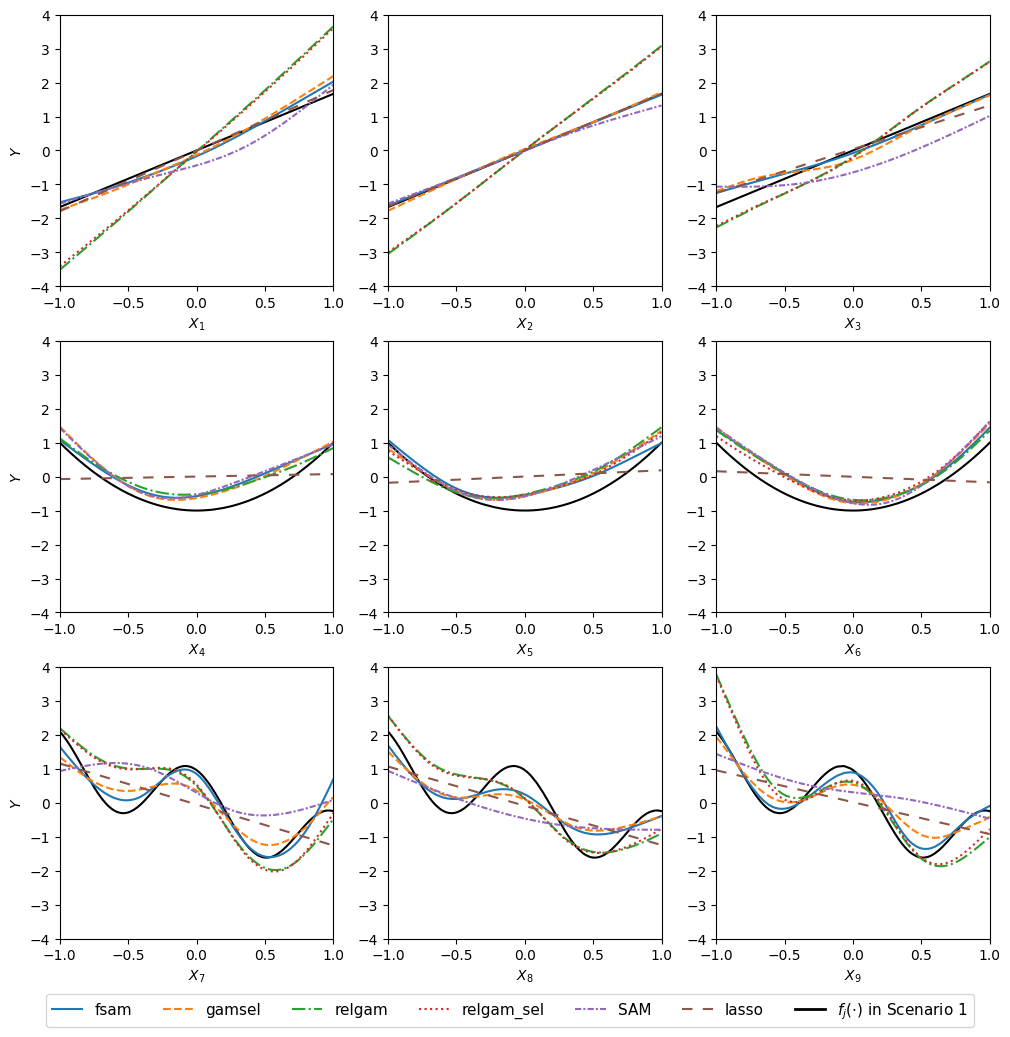

In [21]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
# Define legend lines with both color and linestyle
fsam_line = plt.Line2D([0], [0], color="#1f77b4", linestyle="-", label="fsam")
gamsel_line = plt.Line2D([0], [0], color="#ff7f0e", linestyle="--", label="gamsel")
relgam_line = plt.Line2D([0], [0], color="#2ca02c", linestyle="-.", label="relgam")
relsel_line = plt.Line2D([0], [0], color="#d62728", linestyle=":", label="relgam_sel")
sam_line = plt.Line2D(
    [0], [0], color="#9467bd", linestyle=(0, (3, 1, 1, 1)), label="SAM"
)
lasso_line = plt.Line2D([0], [0], color="#8c564b", linestyle=(0, (5, 5)), label="lasso")
# Adjust or remove theo_line if not applicable to match the existing textures

theo_line = plt.Line2D([0], [0], color="k", lw=2, label="$f_j(\cdot)$ in Scenario 1")

for i, ax in enumerate(axs.flatten()):
    ax.plot(
        np.sort(data.iloc[:, i]),
        f(np.sort(data.iloc[:, i]))[i],
        c="k",
        label="$f_j(\cdot)$ in Scenario 1",
    )
    if predictions.loc[:, [f"FSAM_L{i+1}", f"FSAM_N{i+1}"]].sum(axis=1).ne(0).sum() > 0:
        ax.plot(
            np.sort(data.iloc[:, i]),
            predictions.loc[:, f"FSAM_L{i+1}"].values[np.argsort(data.iloc[:, i])]
            + predictions.loc[:, f"FSAM_N{i+1}"].values[np.argsort(data.iloc[:, i])],
            label="FSAM",
            color="#1f77b4",
            linestyle="-",
        )
    if (
        predictions.loc[:, [f"GAMSEL_L{i+1}", f"GAMSEL_N{i+1}"]].sum(axis=1).ne(0).sum()
        > 0
    ):
        ax.plot(
            np.sort(data.iloc[:, i]),
            predictions.loc[:, f"GAMSEL_L{i+1}"].values[np.argsort(data.iloc[:, i])]
            + predictions.loc[:, f"GAMSEL_N{i+1}"].values[np.argsort(data.iloc[:, i])],
            label="GAMSEL",
            color="#ff7f0e",
            linestyle="--",
        )
    if (
        predictions.loc[:, [f"RELGAM_L{i+1}", f"RELGAM_N{i+1}"]].sum(axis=1).ne(0).sum()
        > 0
    ):
        ax.plot(
            np.sort(data.iloc[:, i]),
            predictions.loc[:, f"RELGAM_L{i+1}"].values[np.argsort(data.iloc[:, i])]
            + predictions.loc[:, f"RELGAM_N{i+1}"].values[np.argsort(data.iloc[:, i])],
            label="RELGAM",
            color="#2ca02c",
            linestyle="-.",
        )
    if (
        predictions.loc[:, [f"RELSEL_L{i+1}", f"RELSEL_N{i+1}"]].sum(axis=1).ne(0).sum()
        > 0
    ):
        ax.plot(
            np.sort(data.iloc[:, i]),
            predictions.loc[:, f"RELSEL_L{i+1}"].values[np.argsort(data.iloc[:, i])]
            + predictions.loc[:, f"RELSEL_N{i+1}"].values[np.argsort(data.iloc[:, i])],
            label="RELGAM_SEL",
            color="#d62728",
            linestyle=":",
        )
    if predictions.loc[:, [f"SAM_L{i+1}", f"SAM_N{i+1}"]].sum(axis=1).ne(0).sum() > 0:
        ax.plot(
            np.sort(data.iloc[:, i]),
            predictions.loc[:, f"SAM_L{i+1}"].values[np.argsort(data.iloc[:, i])]
            + predictions.loc[:, f"SAM_N{i+1}"].values[np.argsort(data.iloc[:, i])],
            label="SAM",
            color="#9467bd",
            linestyle=(0, (3, 1, 1, 1)),
        )
    if (
        predictions.loc[:, [f"LASSO_L{i+1}", f"LASSO_N{i+1}"]].sum(axis=1).ne(0).sum()
        > 0
    ):
        ax.plot(
            np.sort(data.iloc[:, i]),
            predictions.loc[:, f"LASSO_L{i+1}"].values[np.argsort(data.iloc[:, i])],
            label="LASSO",
            color="#8c564b",
            linestyle=(0, (5, 5)),
        )

    ax.set_xlabel(f"$X_{i+1}$")
    ax.set_ylim((-4, 4))
    ax.set_xlim((-1, 1))
    if i in [0, 3, 6]:
        ax.set_ylabel("$Y$")

# Plot with custom legend

fig.legend(
    handles=[
        fsam_line,
        gamsel_line,
        relgam_line,
        relsel_line,
        sam_line,
        lasso_line,
        theo_line,
    ],
    loc="center",
    bbox_to_anchor=(0.5, 0.05),
    ncol=7,
    bbox_transform=fig.transFigure,
    prop={"size": 11},
)
fig.savefig("../img/scatters.pdf", bbox_inches="tight")

In [22]:
def plot_boxplots(
    df, scenarios, ps, key_y, lefttitles, order, ylim=None, figsize=(20, 30), **kwargs
):
    nrows = len(scenarios) * len(ps)
    ncols = len(key_y)
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize, sharey=False, sharex=True)

    axes = axes.flatten()
    for _, (ax, scenario, num_vars, key, lefttitle) in enumerate(
        zip(
            axes,
            np.repeat(scenarios, len(key_y) * len(ps)),
            np.repeat(ps, len(key_y)).tolist() * len(scenarios),
            key_y * len(ps) * len(scenarios),
            lefttitles * len(ps) * len(scenarios),
        )
    ):
        df1 = df.loc[df["Scenario"] == scenario]
        df_ = df1.loc[df1["num_vars"] == num_vars]
        _ = sns.boxplot(
            data=df_,
            x="Method",
            y=key,
            hue="SNR",
            ax=ax,
            order=order,
            palette=sns.color_palette(palette=None),
            **kwargs,
        )

        _ = ax.set_title(f"Scenario ${scenario},$   $p={num_vars}$", fontsize=18)

        _ = ax.annotate(
            lefttitle,
            xy=(0, 0),
            xytext=(-ax.yaxis.labelpad + 5, 0),
            xycoords=ax.yaxis.label,
            textcoords="offset points",
            size=14,
            ha="right",
            va="center",
            rotation="vertical",
        )

        _ = ax.set_xticklabels([x.lower() for x in order], rotation=30, fontsize=18)
        _ = ax.set_ylabel("ylabel")

        if ylim:
            _ = ax.set_ylim(ylim)
        _ = ax.set_ylabel("")
        _ = ax.set_xlabel("")
        _ = ax.get_legend().remove()

    return fig, axes

In [23]:
df1 = pd.read_csv("../data/scenario_1.csv")
df2 = pd.read_csv("../data/scenario_2.csv")
df3 = pd.read_csv("../data/scenario_3.csv")
df = pd.concat([df1, df2, df3]).reset_index(drop=True)
df["true_nzero"] = pd.Series(
    df.T.apply(
        lambda x: true_nonzero(int(x["Scenario"]), int(x["num_vars"]))
    ).values.T.tolist(),
    index=df.index,
)

FIGURE $2$. Boxplots of the ACC, TPR, and TNR metrics in Table $8$ for the linear components across the fifty instances generated for each scenario in Table $1$, with $p\in\{100,200\}$ and $\text{SNR}\in\{1,2,4\}$.

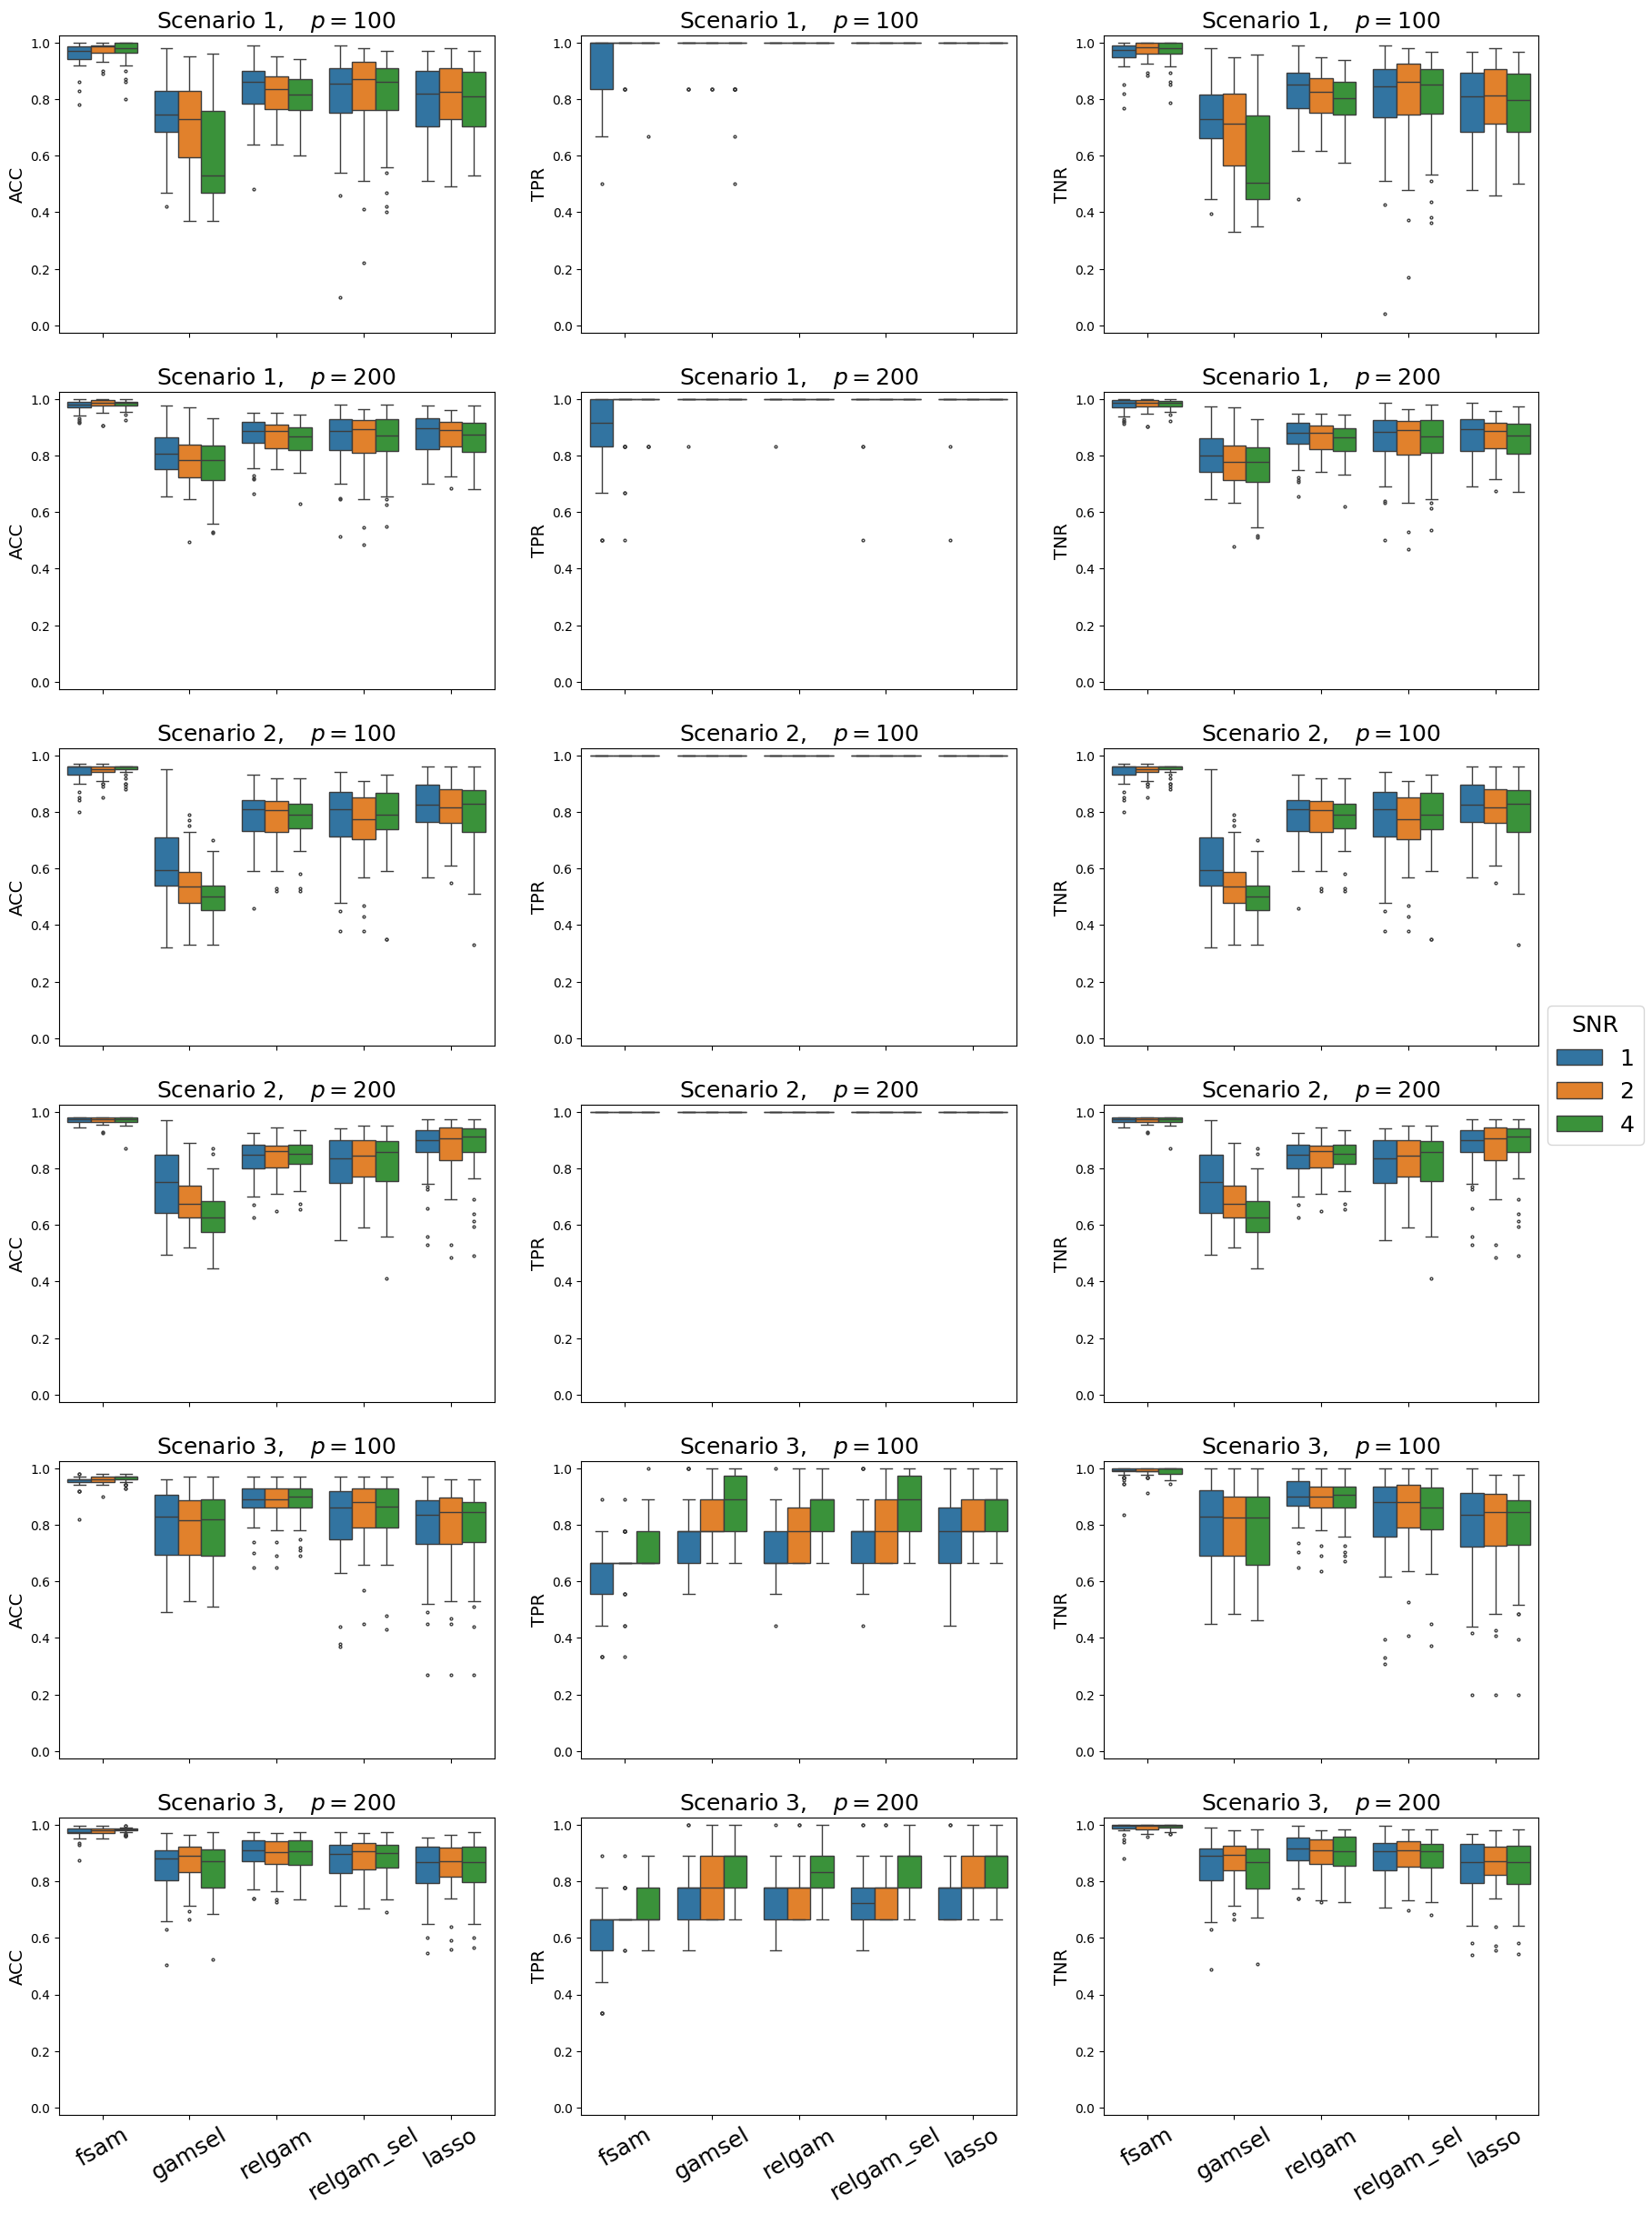

In [24]:
methods_lin = ["FSAM", "GAMSEL", "RELGAM", "RELGAM_SEL", "LASSO"]
df_ = compute_metrics(df.query("Method in @methods_lin"), True)
scenarios = [1, 2, 3]
ps = [100, 200]

fig, axes = plot_boxplots(
    df_,
    scenarios,
    ps,
    ["ACC_lin", "TPR_lin", "TNR_lin"],
    ["ACC", "TPR", "TNR"],
    methods_lin,
    ylim=(-0.025, 1.025),
    figsize=(21.0, 29.7),
    **{"showfliers": True, "fliersize": 2.0},
)

_ = plt.legend(
    loc="center",
    bbox_to_anchor=(1.13, 3.5),
    title="SNR",
    fontsize=18,
    title_fontsize=18,
)
plt.savefig("../img/metrics_accuracy_lin.pdf", format="pdf", bbox_inches="tight")

FIGURE $3$. Boxplots of the ACC, TPR, and TNR metrics in Table $8$ for the non-linear components across the fifty instances generated for each scenario in Table $1$, with $p\in\{100,200\}$ and $\text{SNR}\in\{1,2,4\}$.

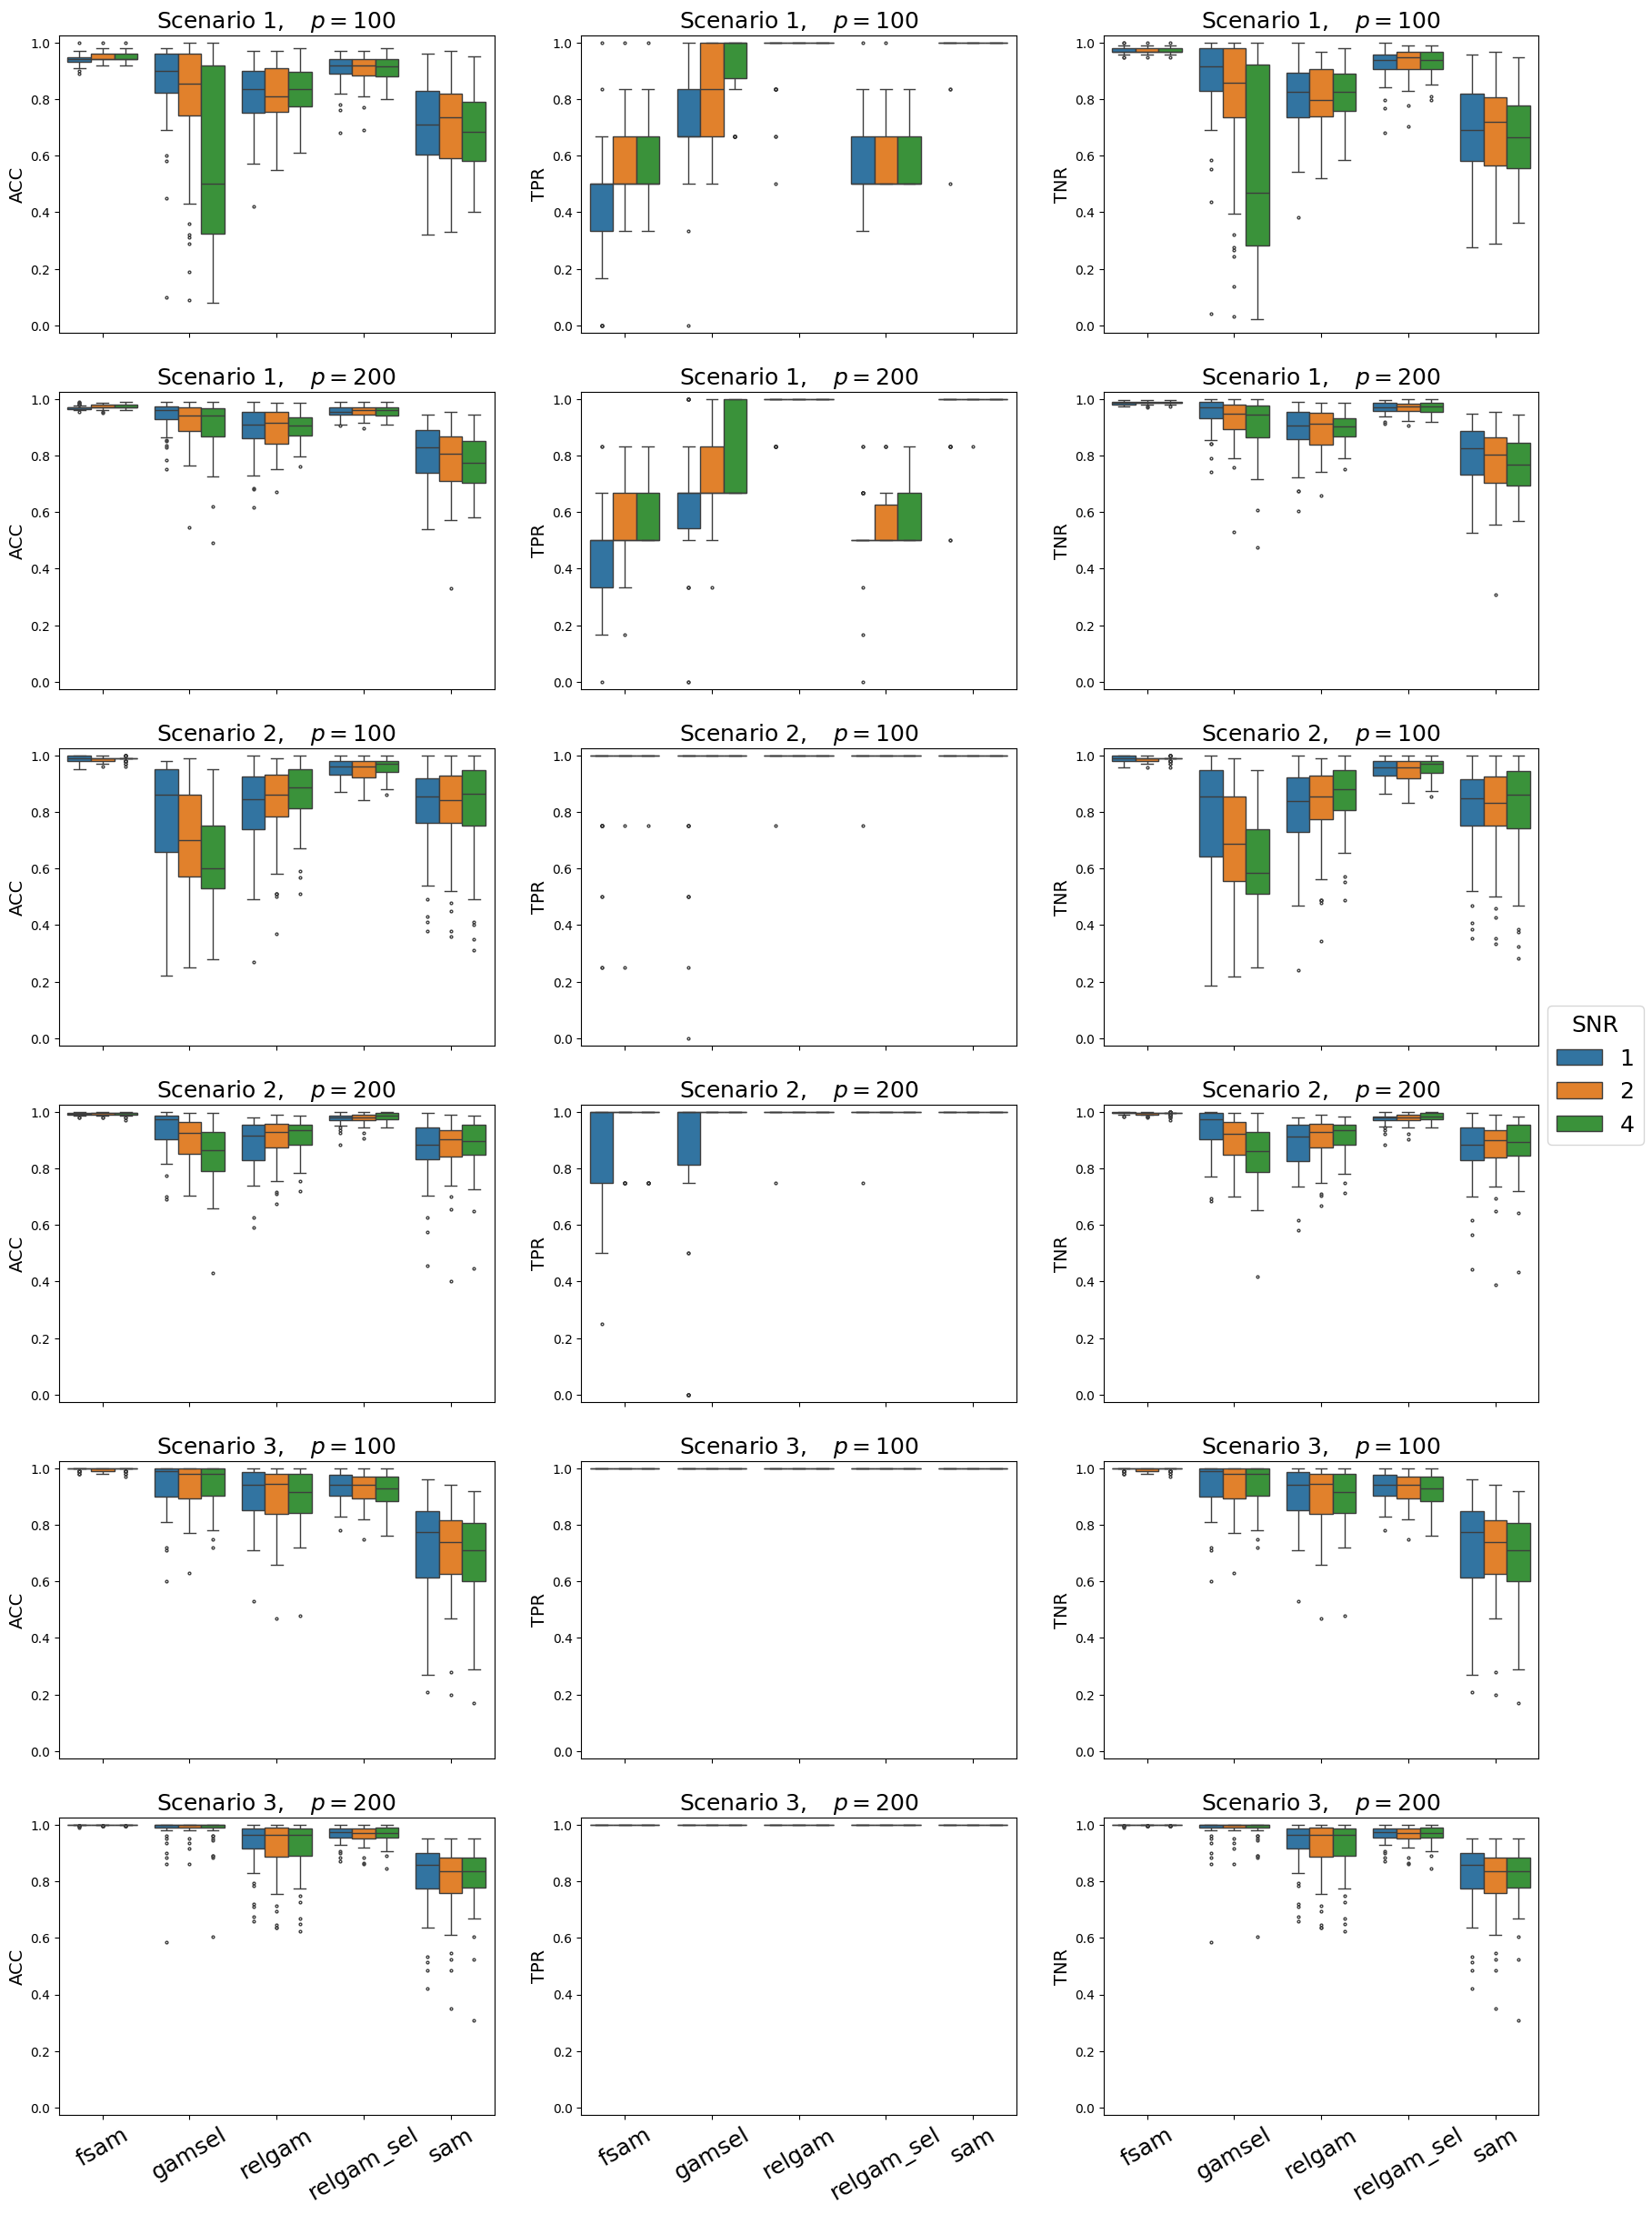

In [25]:
methods_nonlin = ["FSAM", "GAMSEL", "RELGAM", "RELGAM_SEL", "SAM"]
df_ = compute_metrics(df.query("Method in @methods_nonlin"), False)

fig, axes = plot_boxplots(
    df_,
    scenarios,
    ps,
    ["ACC_nonlin", "TPR_nonlin", "TNR_nonlin"],
    lefttitles=["ACC", "TPR", "TNR"],
    order=methods_nonlin,
    ylim=(-0.025, 1.025),
    figsize=(21.0, 29.7),
    **{"showfliers": True, "fliersize": 2.0},
)
_ = plt.legend(
    loc="center",
    bbox_to_anchor=(1.13, 3.5),
    title="SNR",
    fontsize=18,
    title_fontsize=18,
)
plt.savefig("../img/metrics_accuracy_nonlin.pdf", format="pdf", bbox_inches="tight")

FIGURE $4$. Boxplots of MAE and MSE metrics in Table $9$ across the fifty instances generated for each scenario in Table $1$, with $p\in\{100,200\}$ and $\text{SNR}\in\{1,2,4\}.$ 

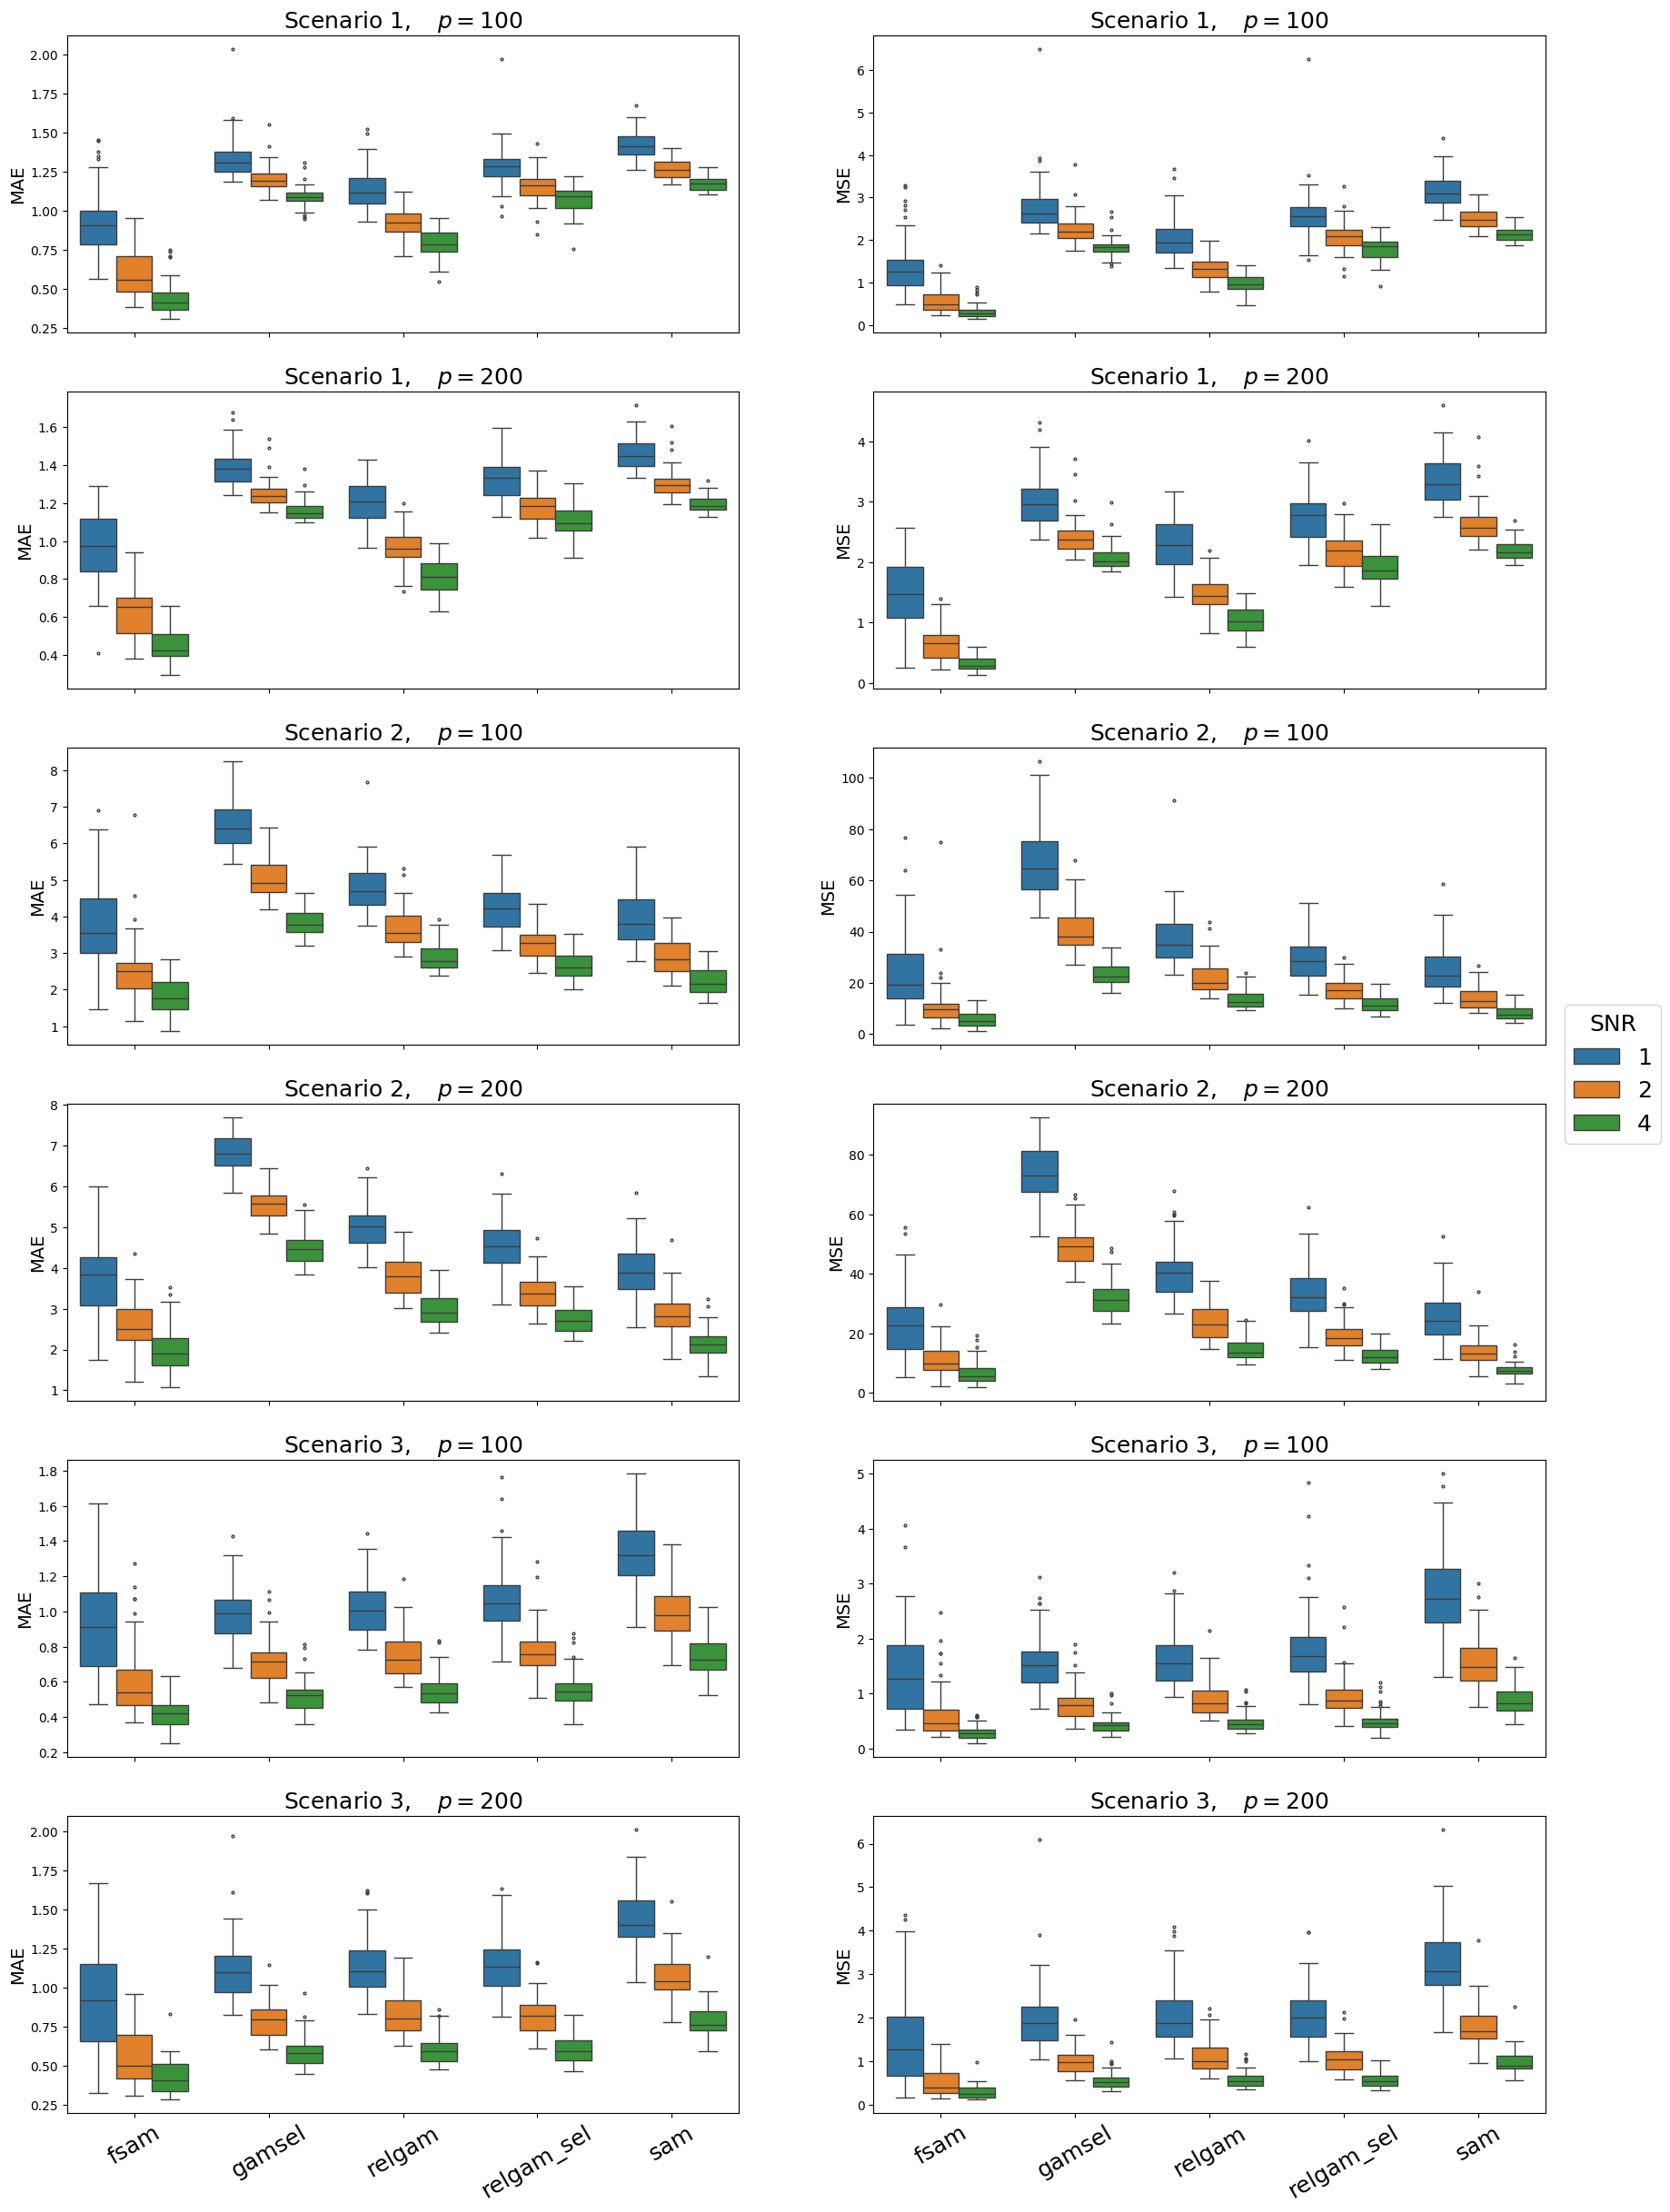

In [26]:
fig, axes = plot_boxplots(
    df,
    scenarios,
    ps,
    ["MAE", "MSE"],
    lefttitles=["MAE", "MSE"],
    order=methods_nonlin,
    figsize=(21.0, 29.7),
    **{"showfliers": True, "fliersize": 2.0},
)

_ = plt.legend(
    loc="center", bbox_to_anchor=(1.1, 3.5), title="SNR", fontsize=18, title_fontsize=18
)
plt.savefig("../img/metrics_error.pdf", format="pdf", bbox_inches="tight")

FIGURE $5-13$. Zoomed-in subplot in each position of Figure $1$, with sample data shown as gray dots.

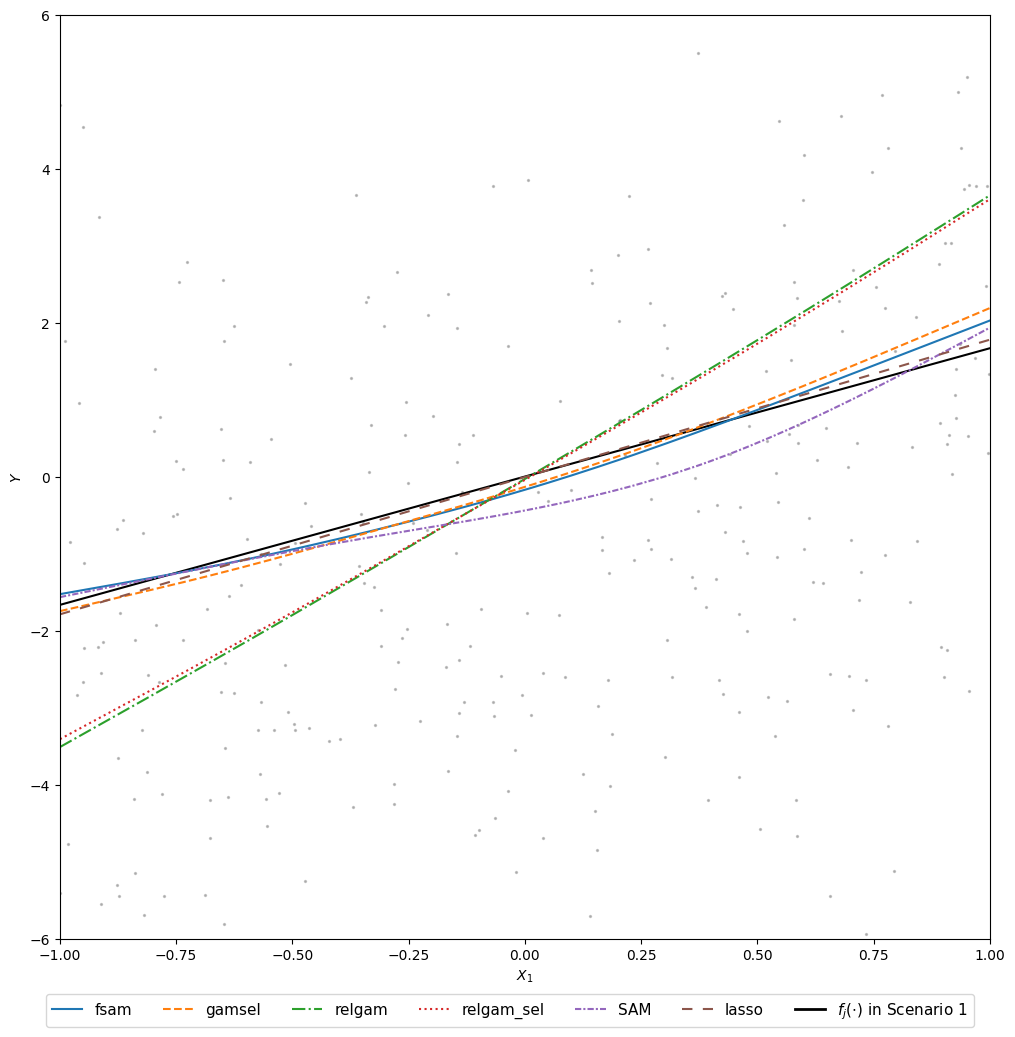

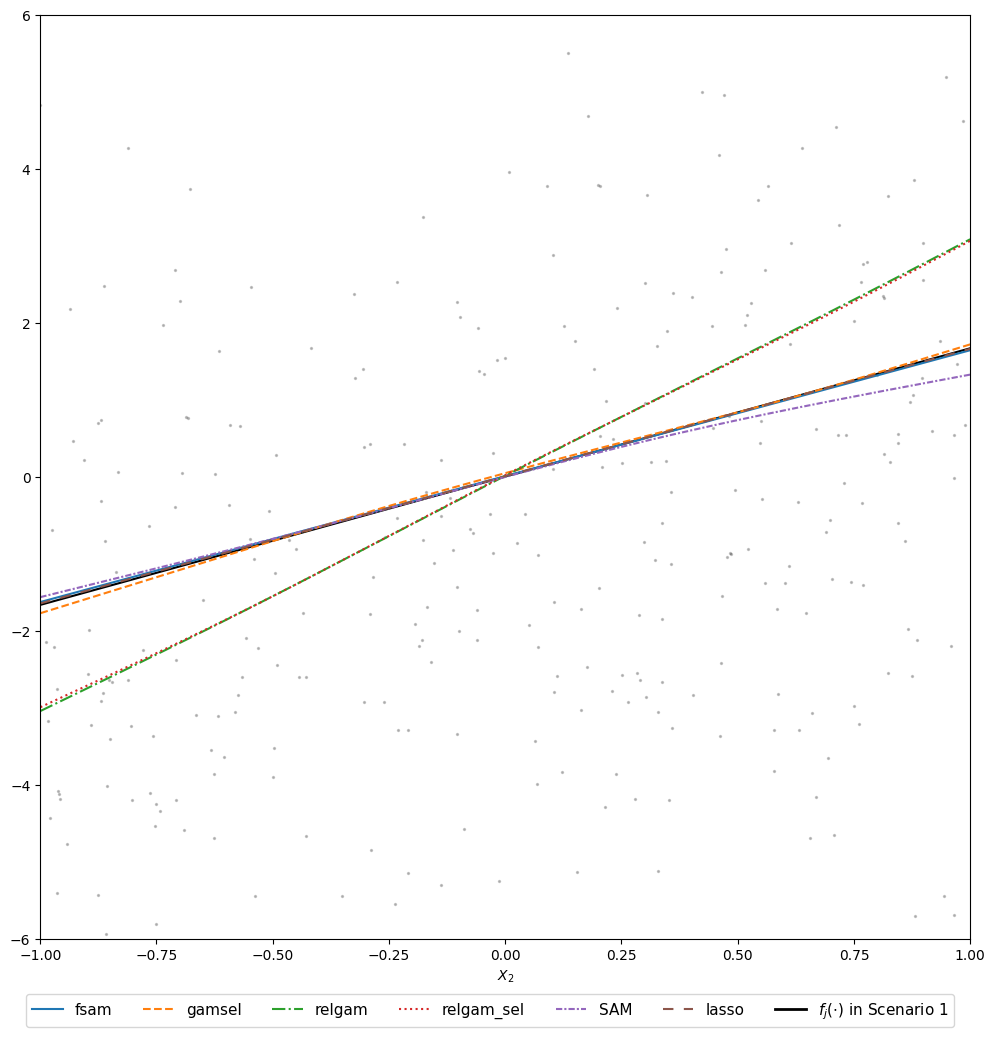

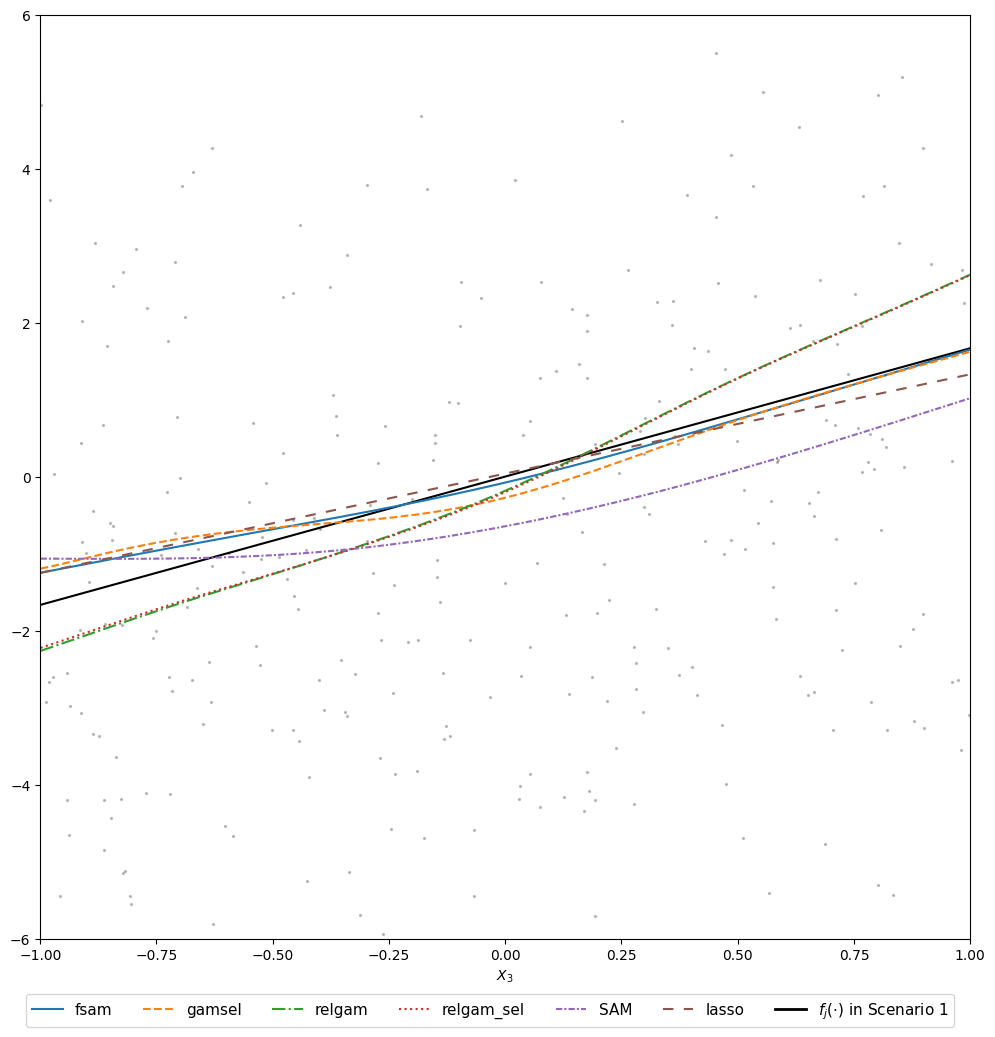

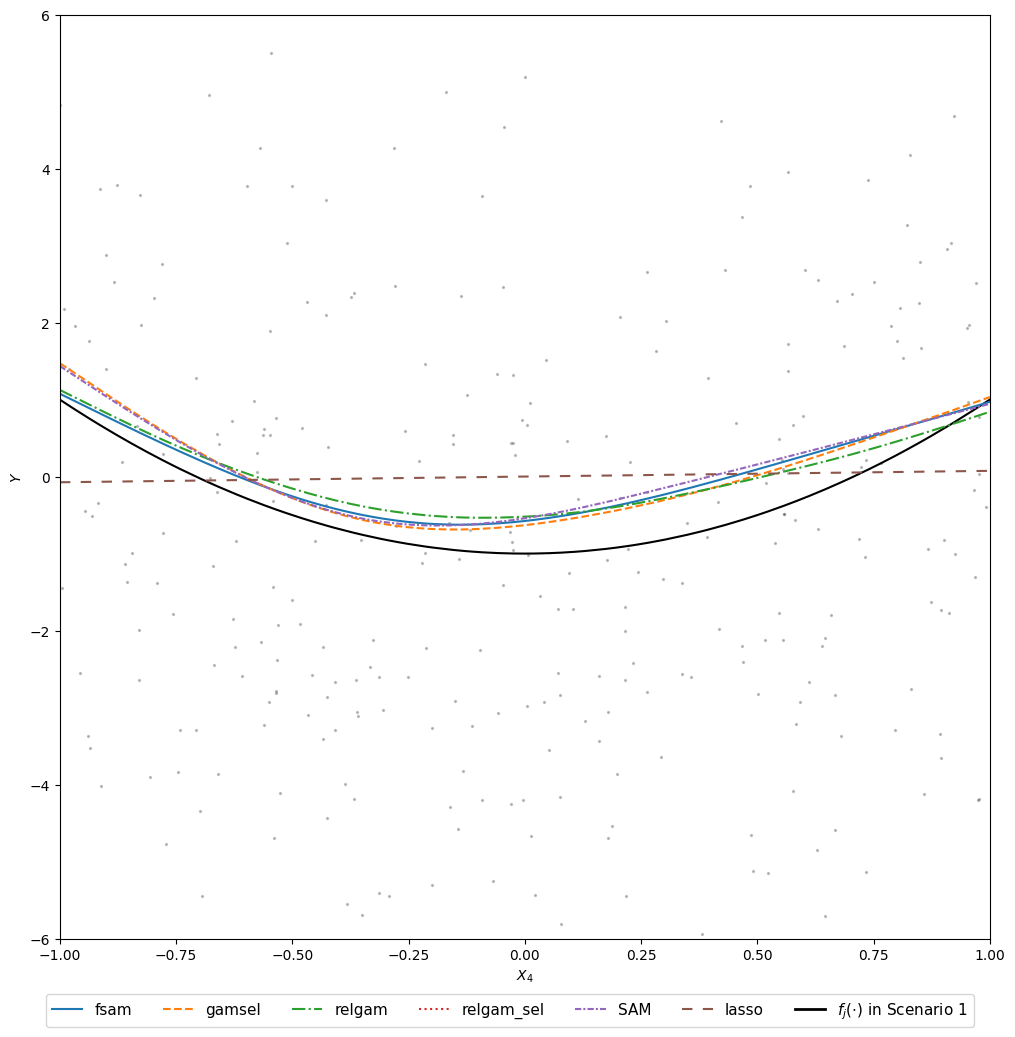

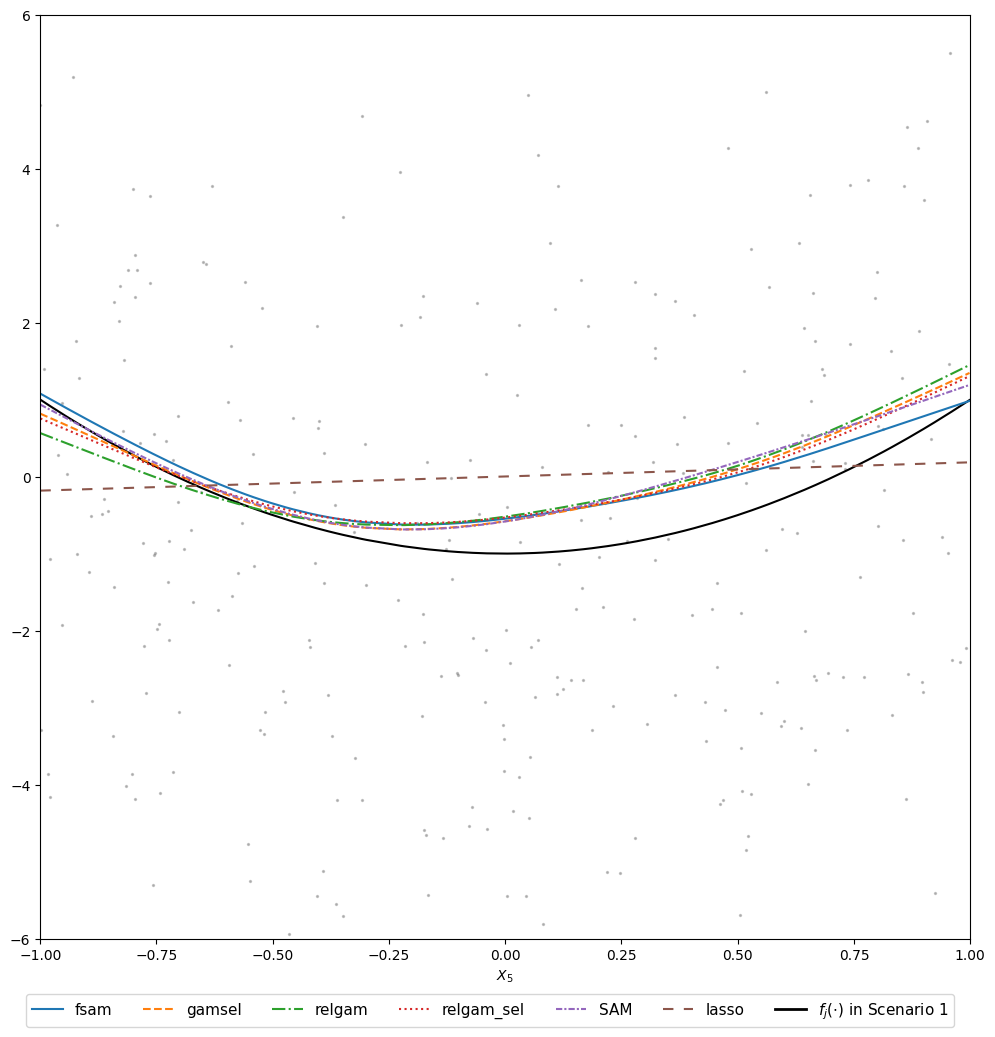

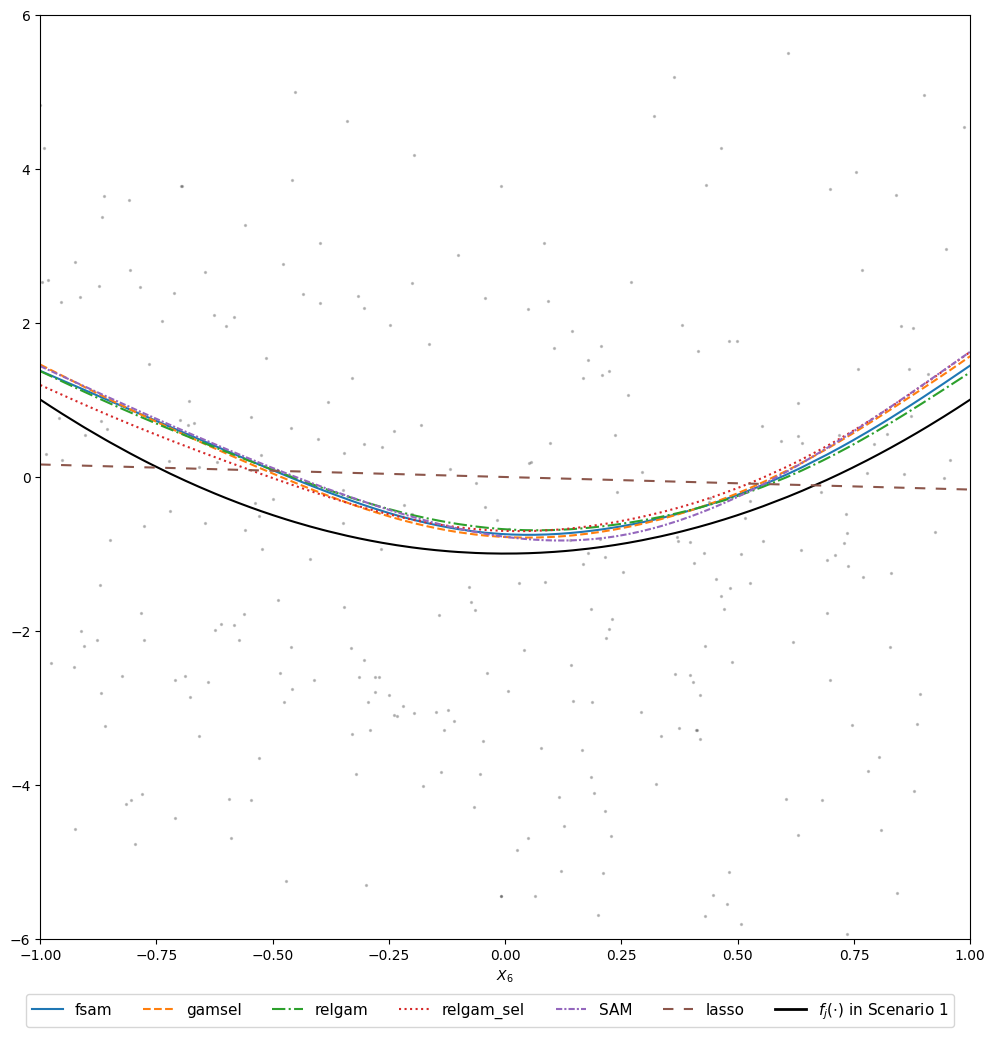

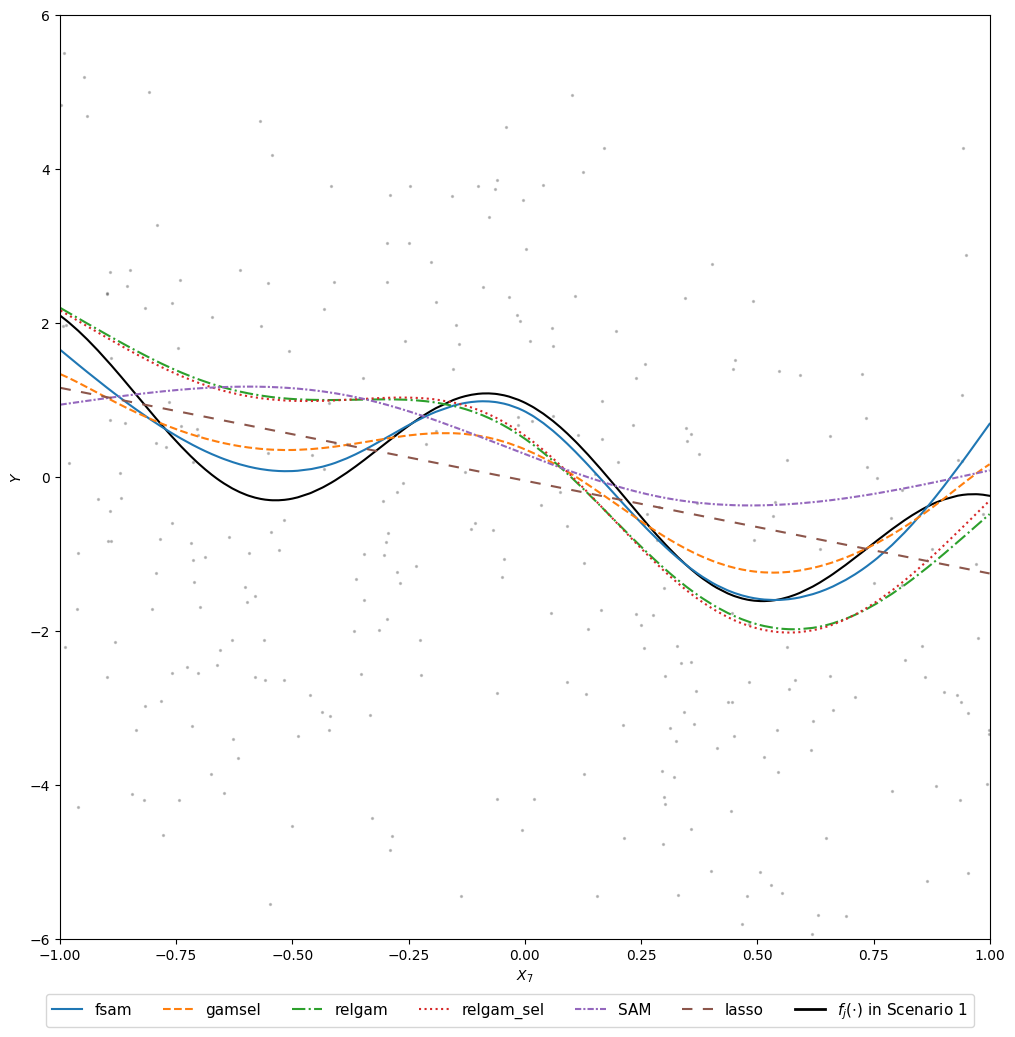

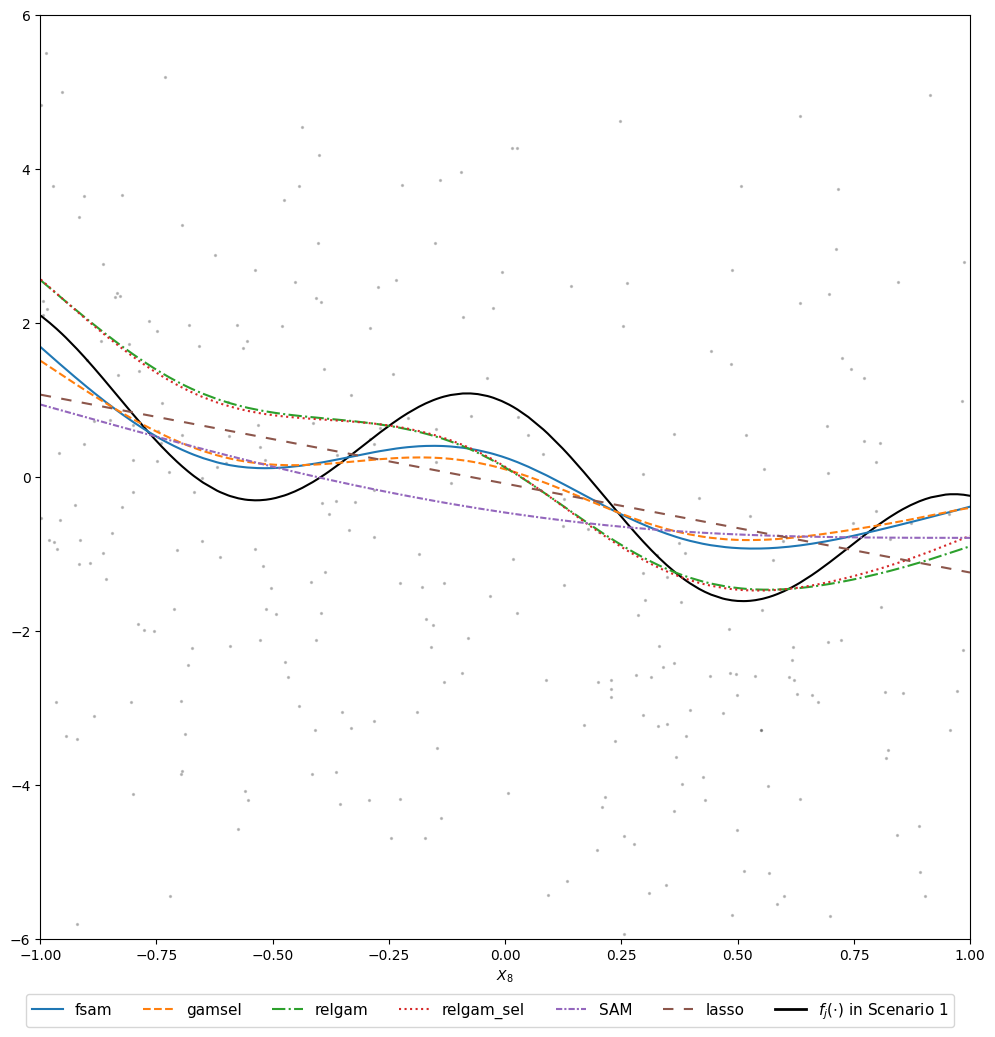

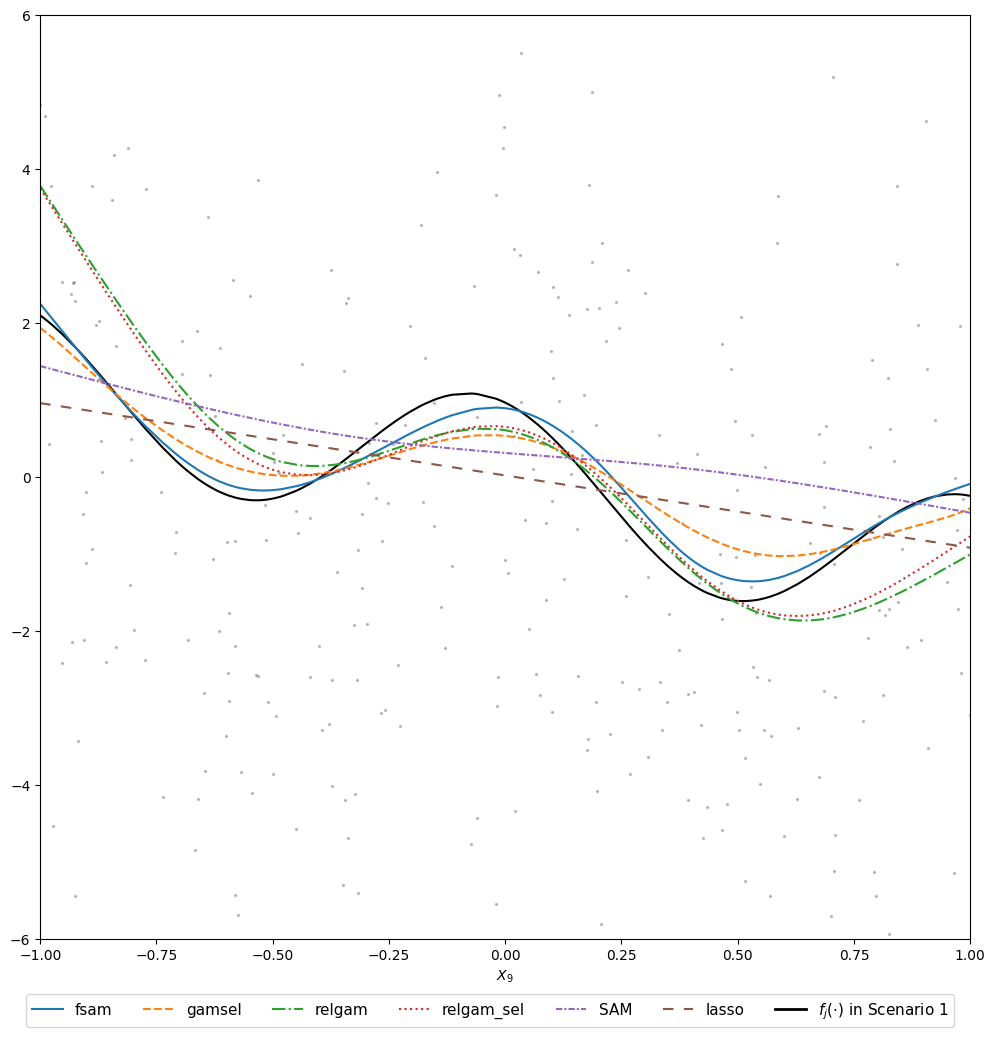

In [27]:
# Define legend lines with both color and linestyle
fsam_line = plt.Line2D([0], [0], color="#1f77b4", linestyle="-", label="fsam")
gamsel_line = plt.Line2D([0], [0], color="#ff7f0e", linestyle="--", label="gamsel")
relgam_line = plt.Line2D([0], [0], color="#2ca02c", linestyle="-.", label="relgam")
relsel_line = plt.Line2D([0], [0], color="#d62728", linestyle=":", label="relgam_sel")
sam_line = plt.Line2D(
    [0], [0], color="#9467bd", linestyle=(0, (3, 1, 1, 1)), label="SAM"
)
lasso_line = plt.Line2D([0], [0], color="#8c564b", linestyle=(0, (5, 5)), label="lasso")
# Adjust or remove theo_line if not applicable to match the existing textures

theo_line = plt.Line2D([0], [0], color="k", lw=2, label="$f_j(\cdot)$ in Scenario 1")

for i in range(9):
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.plot(
        np.sort(data.iloc[:, i]),
        f(np.sort(data.iloc[:, i]))[i],
        c="k",
        label="$f_j(\cdot)$ in Scenario 1",
    )
    ax.scatter(data.iloc[:, i], data.iloc[:, 9], alpha=0.2, c="k", s=2)
    if predictions.loc[:, [f"FSAM_L{i+1}", f"FSAM_N{i+1}"]].sum(axis=1).ne(0).sum() > 0:
        ax.plot(
            np.sort(data.iloc[:, i]),
            predictions.loc[:, f"FSAM_L{i+1}"].values[np.argsort(data.iloc[:, i])]
            + predictions.loc[:, f"FSAM_N{i+1}"].values[np.argsort(data.iloc[:, i])],
            label="FSAM",
            color="#1f77b4",
            linestyle="-",
        )
    if (
        predictions.loc[:, [f"GAMSEL_L{i+1}", f"GAMSEL_N{i+1}"]].sum(axis=1).ne(0).sum()
        > 0
    ):
        ax.plot(
            np.sort(data.iloc[:, i]),
            predictions.loc[:, f"GAMSEL_L{i+1}"].values[np.argsort(data.iloc[:, i])]
            + predictions.loc[:, f"GAMSEL_N{i+1}"].values[np.argsort(data.iloc[:, i])],
            label="GAMSEL",
            color="#ff7f0e",
            linestyle="--",
        )
    if (
        predictions.loc[:, [f"RELGAM_L{i+1}", f"RELGAM_N{i+1}"]].sum(axis=1).ne(0).sum()
        > 0
    ):
        ax.plot(
            np.sort(data.iloc[:, i]),
            predictions.loc[:, f"RELGAM_L{i+1}"].values[np.argsort(data.iloc[:, i])]
            + predictions.loc[:, f"RELGAM_N{i+1}"].values[np.argsort(data.iloc[:, i])],
            label="RELGAM",
            color="#2ca02c",
            linestyle="-.",
        )
    if (
        predictions.loc[:, [f"RELSEL_L{i+1}", f"RELSEL_N{i+1}"]].sum(axis=1).ne(0).sum()
        > 0
    ):
        ax.plot(
            np.sort(data.iloc[:, i]),
            predictions.loc[:, f"RELSEL_L{i+1}"].values[np.argsort(data.iloc[:, i])]
            + predictions.loc[:, f"RELSEL_N{i+1}"].values[np.argsort(data.iloc[:, i])],
            label="RELGAM_SEL",
            color="#d62728",
            linestyle=":",
        )
    if predictions.loc[:, [f"SAM_L{i+1}", f"SAM_N{i+1}"]].sum(axis=1).ne(0).sum() > 0:
        ax.plot(
            np.sort(data.iloc[:, i]),
            predictions.loc[:, f"SAM_L{i+1}"].values[np.argsort(data.iloc[:, i])]
            + predictions.loc[:, f"SAM_N{i+1}"].values[np.argsort(data.iloc[:, i])],
            label="SAM",
            color="#9467bd",
            linestyle=(0, (3, 1, 1, 1)),
        )
    if (
        predictions.loc[:, [f"LASSO_L{i+1}", f"LASSO_N{i+1}"]].sum(axis=1).ne(0).sum()
        > 0
    ):
        ax.plot(
            np.sort(data.iloc[:, i]),
            predictions.loc[:, f"LASSO_L{i+1}"].values[np.argsort(data.iloc[:, i])],
            label="LASSO",
            color="#8c564b",
            linestyle=(0, (5, 5)),
        )

    ax.set_xlabel(f"$X_{i+1}$")
    ax.set_ylim((-6, 6))
    ax.set_xlim((-1, 1))
    if i in [0, 3, 6]:
        ax.set_ylabel("$Y$")
    ax.figure.legend(
        handles=[
            fsam_line,
            gamsel_line,
            relgam_line,
            relsel_line,
            sam_line,
            lasso_line,
            theo_line,
        ],
        loc="center",
        bbox_to_anchor=(0.5, 0.05),
        ncol=7,
        bbox_transform=fig.transFigure,
        prop={"size": 11},
    )
    ax.figure.savefig(f"../img/scatters_{i}.pdf", bbox_inches="tight")